
Метрики для модели Logistic Regression:
Accuracy: 0.73
Precision: 0.74
Recall: 0.87
F1: 0.80
ROC-AUC: 0.81

Метрики для модели SVM:
Accuracy: 0.62
Precision: 0.62
Recall: 1.00
F1: 0.77
ROC-AUC: 0.73

Метрики для модели KNN:
Accuracy: 0.68
Precision: 0.68
Recall: 0.91
F1: 0.78
ROC-AUC: 0.63


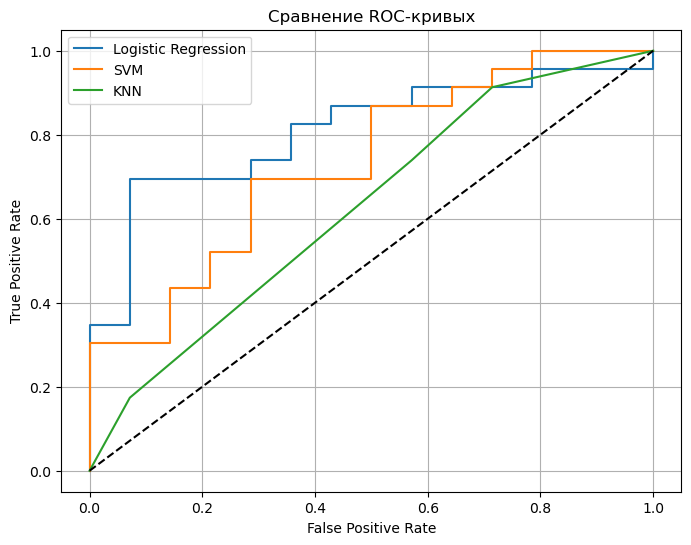

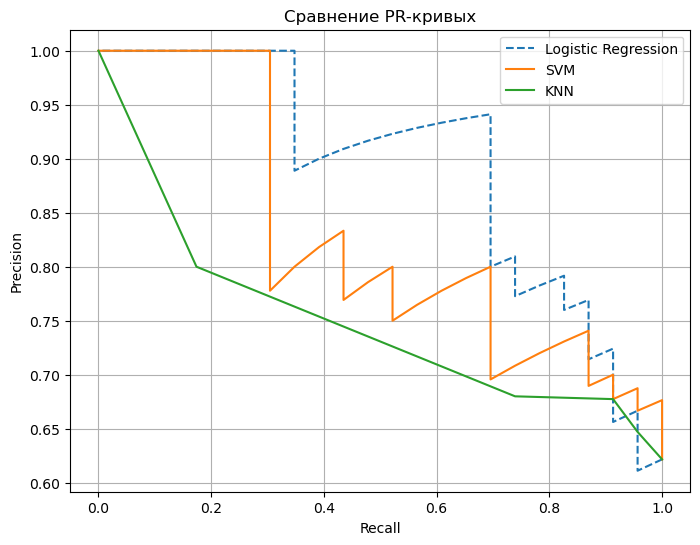

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    precision_recall_curve,
    auc
)


def load_and_preprocess_data():
    """Загрузка и предобработка данных Titanic (как в lab2_2_part1)"""
    data = pd.read_csv("Titanic.csv")
    data_cleaned = data.dropna()
    cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
    data_cleaned = data_cleaned.drop(cols_to_drop, axis=1)
    data_cleaned['Sex'] = data_cleaned['Sex'].map({'male': 0, 'female': 1})
    data_cleaned['Embarked'] = data_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
    return data_cleaned


def evaluate_model(y_true, y_pred, y_proba, model_name):
    """Вывод метрик для одной модели"""
    print(f"\nМетрики для модели {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1: {f1_score(y_true, y_pred):.2f}")

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"ROC-AUC: {roc_auc:.2f}")


def plot_combined_curves(models_data, curve_type='roc'):
    """Отрисовка совмещенных кривых (ROC или PR)"""
    plt.figure(figsize=(8, 6))

    for model_name, (x, y) in models_data.items():
        if curve_type == 'roc':
            plt.plot(x, y, label=f'{model_name}')
        else:  # PR-curve
            plt.plot(x, y, label=f'{model_name}', linestyle='--' if model_name == 'Logistic Regression' else '-')

    if curve_type == 'roc':
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Сравнение ROC-кривых')
    else:
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Сравнение PR-кривых')

    plt.legend()
    plt.grid()
    plt.show()

# 1. Загрузка и подготовка данных
data = load_and_preprocess_data()
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}
# 3. Обучение моделей и сбор данных для графиков
roc_data = {}
pr_data = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    # Вывод метрик
    evaluate_model(y_test, y_pred, y_proba, name)
    # Подготовка данных для графиков
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_data[name] = (recall, precision)
# 4. Отрисовка совмещенных графиков
plot_combined_curves(roc_data, curve_type='roc')
plot_combined_curves(pr_data, curve_type='pr')